In [1]:
#conditional probabilty
# error
import enum, random
class Kid(enum.Enum):
    Boy=1
    girl=0
def random_kid() -> kid:
    return random.choice([kid.boy,kid.girl])
both_girls=0
older_girl=0
either_girl=0

for _in range(10000):
    younger =random_kid()
older =random_kid()
if older == kid.girl:
    older_girl+=1
if older==kid.girl and younger==kid.girl:
    both_girls+=1
if older==kid.girl or younger ==kid.girl:
    either_girl+=1


print("P(both | older):",both_girls/older_girl)
print("P(both | either):",both_girls/either_girl)

SyntaxError: invalid syntax (275432355.py, line 11)

In [2]:
# corrected one
import enum, random # random: Provides functions to generate random choices (simulating random kids).
                    #enum: Allows you to define a fixed set of symbolic names (here, Kid.Boy and Kid.girl).

class Kid(enum.Enum): #defines a new enumeration class called Kid.
                        # Enum (short for enumeration) is a special type of class in Python.
                        #allows you to define a fixed set of symbolic names (members) that represent constant values.
                                    #Each member has a name and a value
    Boy = 1
    girl = 0

def random_kid() -> Kid:
    return random.choice([Kid.Boy, Kid.girl]) #random.choice([Kid.Boy, Kid.girl]) picks either a boy or a girl randomly.
                                                # -> Kid is a type hint indicating the function returns a Kid.

both_girls = 0 #both_girls: counts how many times both kids are girls.
older_girl = 0
either_girl = 0

for _ in range(10000):               #Loop runs 10,000 times to simulate many families.  # _ is a convention when the loop variable isn’t used.
    younger = random_kid()            #older and younger are randomly assigned Boy or Girl.
    older = random_kid() 

    if older == Kid.girl:
        older_girl += 1
    if older == Kid.girl and younger == Kid.girl:
        both_girls += 1
    if older == Kid.girl or younger == Kid.girl:
        either_girl += 1

print("P(both | older):", both_girls / older_girl)
print("P(both | either):", both_girls / either_girl)


P(both | older): 0.5049583498611662
P(both | either): 0.33991989319092125


In [4]:
#continous distribution 
# pdf(probabilty distribution function)
def uniform_pdf(x:float) -> float:
    return 1 if 0<=x <1 else 0 

print(uniform_pdf(-0.5))  
print(uniform_pdf(0))     
print(uniform_pdf(0.5))   
print(uniform_pdf(0.999)) 
print(uniform_pdf(1))     
print(uniform_pdf(2))     

0
1
1
1
0
0


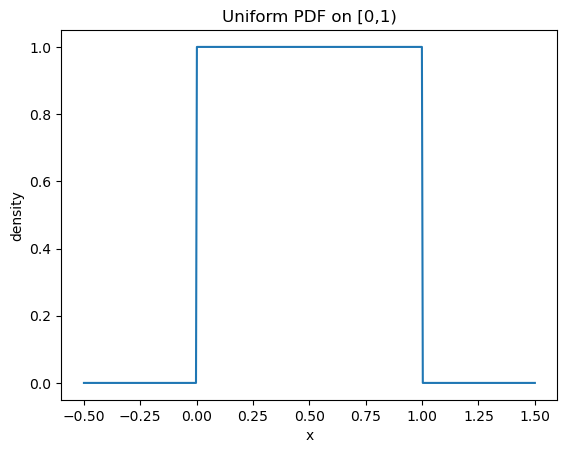

In [5]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(-0.5, 1.5, 500)
ys = [uniform_pdf(x) for x in xs]

plt.plot(xs, ys)
plt.title("Uniform PDF on [0,1)")
plt.xlabel("x")
plt.ylabel("density")
plt.show()


In [11]:
# cdf (cummulative distribution function)
def uniform_cdf(x:float) -> float:
    if x <0:
    elif x<1
    else: return 1
        

IndentationError: expected an indented block after 'if' statement on line 3 (787920177.py, line 4)

In [12]:
# CORRECTION
def uniform_cdf(x: float) -> float:
    """Cumulative distribution function for uniform [0,1)"""
    if x < 0:
        return 0
    elif x < 1:
        return x
    else:
        return 1

In [13]:
print(uniform_cdf(-0.5))  # 0
print(uniform_cdf(0))     # 0
print(uniform_cdf(0.25))  # 0.25
print(uniform_cdf(0.5))   # 0.5
print(uniform_cdf(0.999)) # 0.999
print(uniform_cdf(1))     # 1
print(uniform_cdf(2))     # 1

0
0
0.25
0.5
0.999
1
1


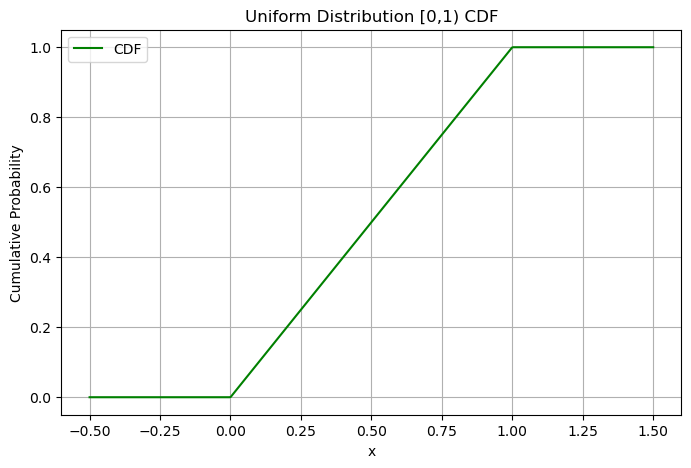

In [27]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(-0.5, 1.5, 500) #numpy.linspace(start, stop, num=50(number of evenly spaced samples to generate), endpoint=True, retstep=False, dtype=None, axis=0)

cdf_vals = [uniform_cdf(x) for x in xs]

# Plot
plt.figure(figsize=(8,5)) #matplotlib.pyplot.figure(figsize=None(width,length), dpi(dots per inch)=None, facecolor=None, edgecolor=None, frameon=True, **kwargs)

plt.plot(xs, cdf_vals, label="CDF", color="green") #plt.plot(x, y, fmt, **kwargs)

plt.title("Uniform Distribution [0,1) CDF")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.legend()
plt.show()


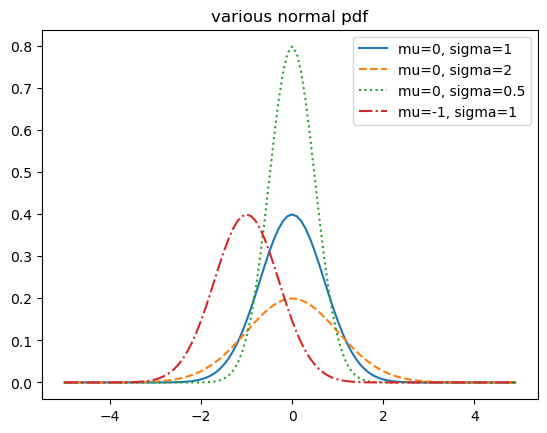

In [16]:
# Normal distribution
# pdf
import math 
Sqrt_2pi = math.sqrt(2*math.pi)
def n_pdf(x: float,mu: float=0,sigma:float=1) -> float:
    return(math.exp(-(x-mu)**2/2/sigma*2))/(Sqrt_2pi*sigma)
import matplotlib.pyplot as plt
xs=[x/10.0 for x in range(-50,50)]
plt.plot(xs,[n_pdf(x,sigma=1)for x in xs], '-' ,label='mu=0, sigma=1')
           # [n_pdf(x, sigma=1) for x in xs] - a list comprehension.                                             

            #'-' style
        # label='mu=0, sigma=1' Adds a label for the legend.
        # plt.plot(x_values, [function(x, param1=value1, param2=value2, ...) for x in x_values], line_style, label="label_name")

plt.plot(xs,[n_pdf(x,sigma=2)for x in xs], '--' ,label='mu=0, sigma=2')
plt.plot(xs,[n_pdf(x,sigma=0.5)for x in xs], ':' ,label='mu=0, sigma=0.5')
plt.plot(xs,[n_pdf(x,mu=-1)for x in xs], '-.' ,label='mu=-1, sigma=1')
plt.legend()
plt.title("various normal pdf")
plt.show()

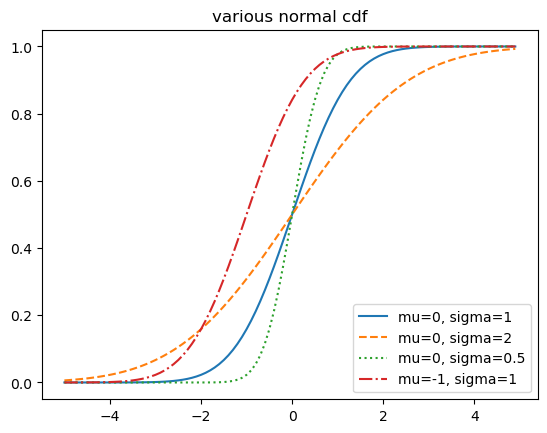

In [18]:
# cdf
def ncdf(x:float,mu:float=0,sigma:float=1) -> float:
    return(1+math.erf((x-mu)/math.sqrt(2)/sigma))/2

xs:[x/10.0 for x in range(-50,50)]
plt.plot(xs,[ncdf(x,sigma=1)for x in xs], '-' ,label='mu=0, sigma=1')
plt.plot(xs,[ncdf(x,sigma=2)for x in xs], '--' ,label='mu=0, sigma=2')
plt.plot(xs,[ncdf(x,sigma=0.5)for x in xs], ':' ,label='mu=0, sigma=0.5')
plt.plot(xs,[ncdf(x,mu=-1)for x in xs], '-.' ,label='mu=-1, sigma=1')
plt.legend(loc=4)
# plt.legend()  Adds a legend to your plot.
# loc controls the location of the legend on the plot.
# | `loc` | Position on Plot |
# | ----- | ---------------- |
# | 0     | Best (automatic) |
# | 1     | Upper right      |
# | 2     | Upper left       |
# | 3     | Lower left       |
# | 4     | Lower right      |
# | 5     | Right            |
# | 6     | Center left      |
# | 7     | Center right     |
# | 8     | Lower center     |
# | 9     | Upper center     |
# | 10    | Center           |

plt.title("various normal cdf")
plt.show()

In [21]:
#inverted normal cdf
def inc(p:float, # The probability for which you want the corresponding z-value in the normal distribution (0 < p < 1).
       mu:float=0, #Mean of the normal distribution. Default is 0 (standard normal).
       sigma:float=1,  #Standard deviation of the normal distribution. Default is 1 (standard normal).
       tolerance:float=0.00001) -> float: #The precision for the numerical method (binary search) used to compute the inverse CDF. Smaller values → more precise.
    if mu != 0 or sigma!=1:
        return mu +sigma*inc(p,tolerance=tolerance)
    lowz=-10.0
    hiz=10.0
    while hiz-lowz> tolerance:
        midz=(lowz+hiz)/2
        midp=(ncdf(midz))
        if midp<p:
            lowz=midz
        else:
            hiz=midz
    return midz

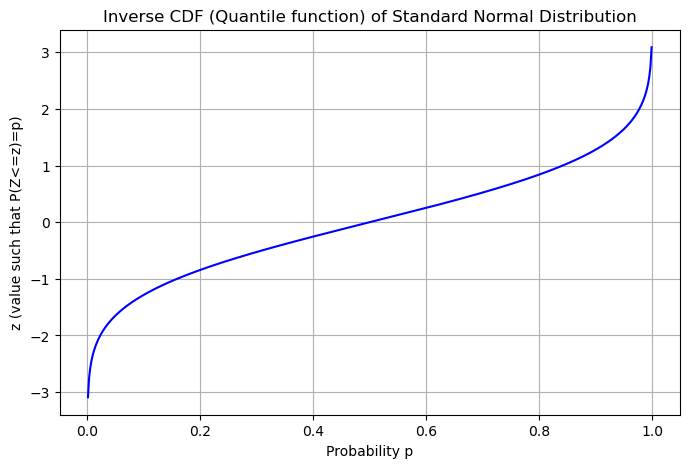

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm  # using built-in for comparison

# Standard normal inverse CDF (using scipy)
ps = np.linspace(0.001, 0.999, 500)
zs = [norm.ppf(p) for p in ps]  # using scipy's PPF

# Plot
plt.figure(figsize=(8,5))
plt.plot(ps, zs, color="blue")
plt.title("Inverse CDF (Quantile function) of Standard Normal Distribution")
plt.xlabel("Probability p")
plt.ylabel("z (value such that P(Z<=z)=p)")
plt.grid(True)
plt.show()


In [40]:
# central limit theorem
def bernouli_trials(p:float) -> int:
    return 1 if random.random() < p else 0

def binomial(n:int,p:float) -> float:
    return sum(bernouli_trials(p)for _ in range(n))

In [41]:
import random

print(binomial(10, 0.5))  # Simulate 10 coin tosses, count heads
print(binomial(10, 0.7))  # Simulate 10 trials with p=0.7

7
3


In [38]:
# error
from collections import Counter
def binomial_histo(p:float,n:int,numpoints:int) -> None:
    data=[binomial(n,p) for _ in range(numpoints)]
    histo=Counter(Data)
    plt.bar([x-0.4 for x in histo.keys()],
           [v/numpoints for v in histo.values()],
           0.8,color=0.75)
    mu=p*n
    sigma=math.sqrt(n*p*(1-p))
    xs=range(min(data),max(data)+1)
    ys=[ncdf(i+0.5,mu,sigma)-ncdf(i-0.5,mu,sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("binomial distribution vs normal distribution")
    plt.show()
    
binomial_histo(0.75,100,10000)


NameError: name 'binomial' is not defined

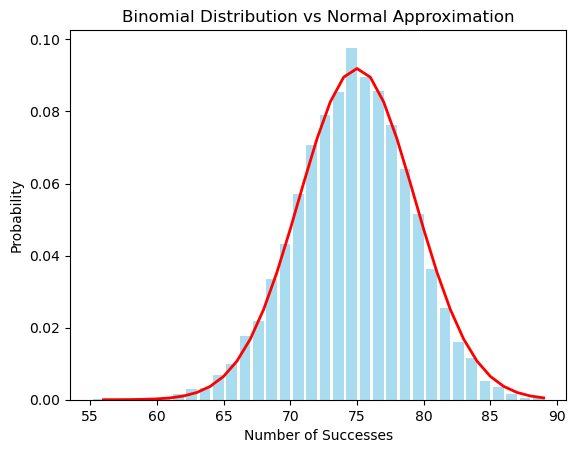

In [42]:
# correct one
def binomial_histo(p: float, n: int, numpoints: int) -> None:
    data = [binomial(n, p) for _ in range(numpoints)] #binomial(n, p) → simulates one binomial random variable (the number of successes in n Bernoulli trials, each with probability p).
    histo = Counter(data) #ounter (from collections) counts how many times each outcome appears in the list data.
 
    # Plot histogram (empirical distribution)
    plt.bar(
        [x - 0.4 for x in histo.keys()], # X positions (shifted left for centering) 
        [v / numpoints for v in histo.values()], # Heights (probabilities)
        0.8,  # Bar width
        color="skyblue",
        alpha=0.7 # Transparency (0=transparent, 1=solid)
)
    )

    # Normal approximation
    mu = p * n # Mean of the Binomial
    sigma = math.sqrt(n * p * (1 - p))
    xs = range(min(data), # the smallest observed number of successes.
    xs = range(min(data), 
               max(data) + 1)

    #range(min, max+1) = all possible integer outcomes between them.
    ys = [ncdf(i + 0.5, mu, sigma) - ncdf(i - 0.5, mu, sigma) for i in xs]

#  ncdf(x, mu, sigma) = cumulative distribution function (CDF) of a normal distribution with mean mu and standard deviation sigma.
    
    plt.plot(xs, ys, color="red", linewidth=2)
    plt.title("Binomial Distribution vs Normal Approximation")
    plt.xlabel("Number of Successes")
    plt.ylabel("Probability")
    plt.show()
binomial_histo(0.75,# Probability of success for each Bernoulli trial.
               100, #Number of trials in each experiment.
               10000) # numpoints: Number of experiments (samples) generated.
